In [1]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
df1=pd.read_csv("airbnb.csv")

In [14]:
df1.shape

(249, 16)

In [15]:
df1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [17]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [18]:
df1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,249.000000,2.490000e+02,249.000000,249.000000,249.000000,249.000000,249.000000,242.000000,249.000000,249.000000
mean,31376.771084,1.499884e+05,40.730257,-73.964044,143.971888,8.718876,103.445783,1.091653,1.738956,198.538153
std,18101.018309,4.010393e+05,0.049660,0.029685,91.442975,20.398680,100.337887,1.000168,1.234635,126.048056
min,2539.000000,2.787000e+03,40.631880,-74.080880,35.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,15711.000000,5.014800e+04,40.688430,-73.984980,85.000000,2.000000,21.000000,0.280000,1.000000,75.000000
50%,28321.000000,9.779700e+04,40.721620,-73.964280,125.000000,3.000000,73.000000,0.795000,1.000000,225.000000
75%,46911.000000,1.936370e+05,40.761930,-73.948220,175.000000,5.000000,166.000000,1.650000,2.000000,310.000000
max,62430.000000,6.197784e+06,40.867540,-73.765970,800.000000,200.000000,467.000000,4.720000,6.000000,365.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    int64  
 1   name                            249 non-null    object 
 2   host_id                         249 non-null    int64  
 3   host_name                       249 non-null    object 
 4   neighbourhood_group             249 non-null    object 
 5   neighbourhood                   249 non-null    object 
 6   latitude                        249 non-null    float64
 7   longitude                       249 non-null    float64
 8   room_type                       249 non-null    object 
 9   price                           249 non-null    int64  
 10  minimum_nights                  249 non-null    int64  
 11  number_of_reviews               249 non-null    int64  
 12  last_review                     242 

In [9]:
df1[["reviews_per_month"]].describe(include="all")

,reviews_per_month
count,242.000000
mean,1.091653
std,1.000168
min,0.010000
25%,0.280000
50%,0.795000
75%,1.650000
max,4.720000


In [14]:
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [15]:
df1[['last_review']].head()

,last_review
0,2018-10-19
1,2019-05-21
2,NaT
3,2019-07-05
4,2018-11-19


In [18]:
df1[['last_review']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   last_review  242 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 KB


In [19]:
df1 = df1.fillna({'reviews_per_month':0})

In [20]:
df1[['reviews_per_month']].head()

,reviews_per_month
0,0.21
1,0.38
2,0.00
3,4.64
4,0.10


In [23]:
df1['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [6]:
df1['room_type'] = df1['room_type'].replace('Entire home/apt','Entire place')

In [22]:
df1['room_type'].unique()

array(['Private room', 'Entire place', 'Shared room'], dtype=object)

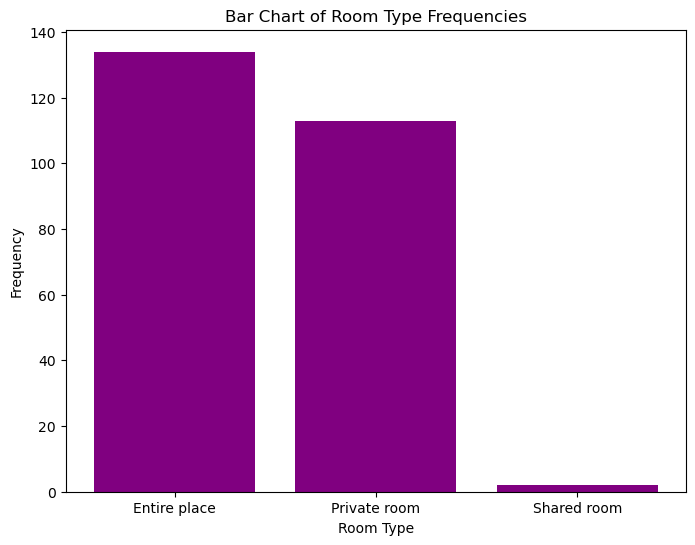

In [12]:
# Bar Chart - Distribution of Room Type:
#This visualization shows the Frequencies of different room types in the Airbnb listings.

room_type_counts = df1['room_type'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color='purple')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Bar Chart of Room Type Frequencies')
plt.show()

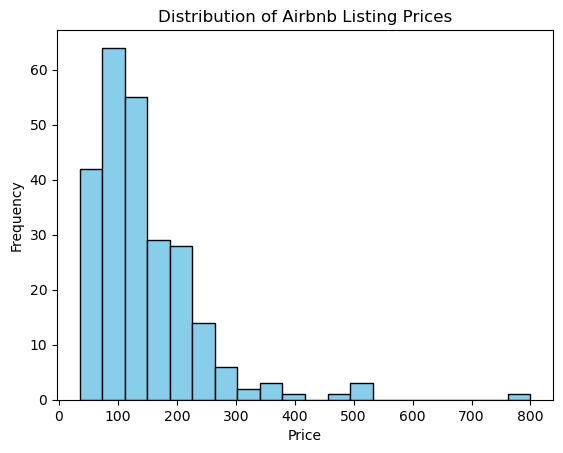

In [5]:
# Histogram - : Distribution of Price
#This visualization shows the distribution of  Airbnb Listing Prices.

plt.hist(df1['price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Prices')
plt.show()

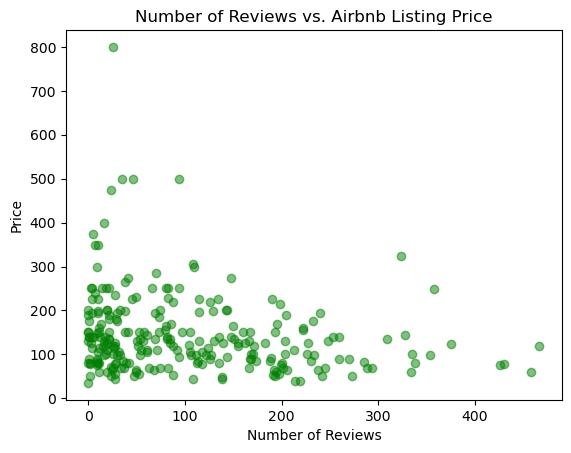

In [8]:
#Scatter Plot - Price vs. Number of Reviews:
#This visualization helps us understand the relationship between listing price and the number of reviews received.

plt.scatter(df1['number_of_reviews'], df1['price'], alpha=0.5, color='green')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Number of Reviews vs. Airbnb Listing Price')
plt.show()

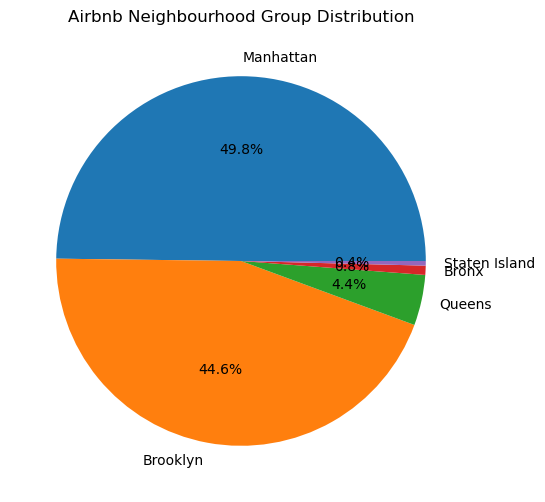

In [23]:
#Pie Chart - Neighborhood Group Distribution:
#This visualization represents the distribution of Airbnb listings across different neighborhood groups.

# Calculate the counts of each neighbourhood group
neighbourhood_group = df1['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(neighbourhood_group.values, labels=neighbourhood_group.index, autopct='%1.1f%%')
plt.title('Airbnb Neighbourhood Group Distribution')
plt.show()

In [2]:
df2 =pd.read_csv("HR.csv")

In [82]:
df2.head()

,Employee_Name,EmpID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [33]:
df2.shape

(311, 36)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [34]:
df2.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [36]:
df2.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
df2 = df2.drop(['dateoftermination'], axis = 1)

In [52]:
df2.shape

(311, 35)

In [4]:
df2 = df2.drop(['MarriedID'], axis = 1)

In [55]:
df2.shape

(311, 34)

In [59]:
df2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
306    False
307    False
308    False
309    False
310    False
Length: 311, dtype: bool

In [61]:
df2['DateofHire'] = pd.to_datetime(df2['DateofHire'])
df2['DOB'] = pd.to_datetime(df2['DOB'])

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MaritalStatusID             311 non-null    int64         
 3   GenderID                    311 non-null    int64         
 4   EmpStatusID                 311 non-null    int64         
 5   DeptID                      311 non-null    int64         
 6   PerfScoreID                 311 non-null    int64         
 7   FromDiversityJobFairID      311 non-null    int64         
 8   Salary                      311 non-null    int64         
 9   Termd                       311 non-null    int64         
 10  PositionID                  311 non-null    int64         
 11  Position                    311 non-null    object        

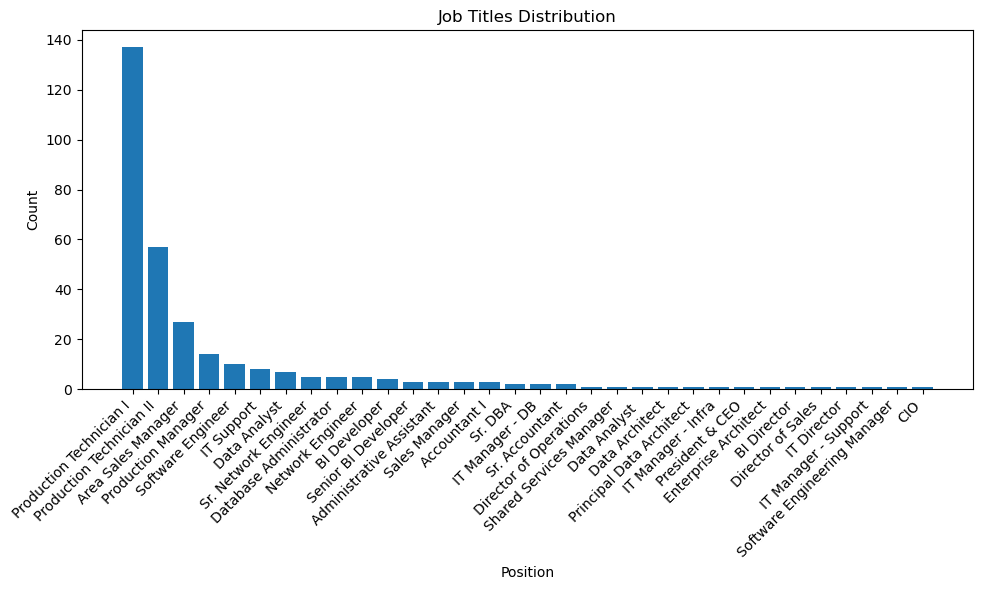

In [66]:
job_title_counts = df2['Position'].value_counts()

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_title_counts.index, job_title_counts.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Job Titles Distribution')
plt.tight_layout()
plt.show()

# This visualization shows the distribution of Job Titles Distribution in HR dtaset

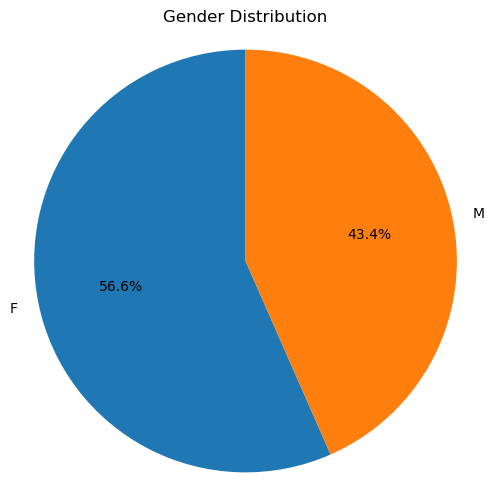

In [70]:
#Count the occurrences of each gender
gender_counts = df2['Sex'].value_counts()

#  pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

# This visualization of Pie Chart shows the Gender Distribution in HR dataset

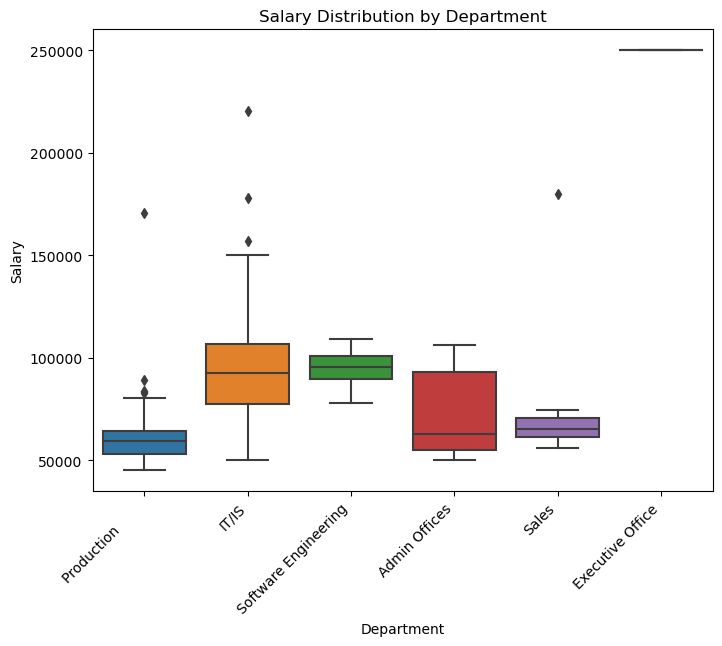

In [73]:

# box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Department', y='Salary', data = df2)
plt.xlabel('Department')
plt.ylabel('Salary')
plt.title('Salary Distribution by Department')
plt.xticks(rotation=45, ha='right')
plt.show()

# This visualization help us understand the Salary Distribution by Department

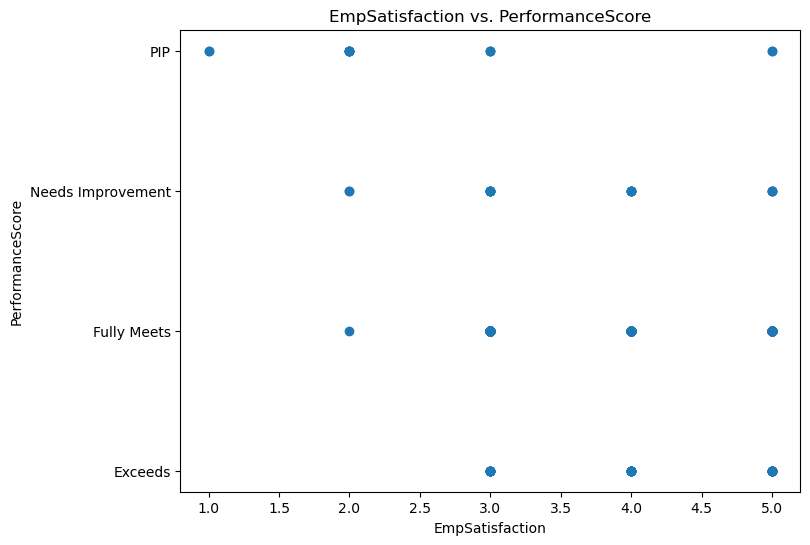

In [77]:
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df2['EmpSatisfaction'], df2['PerformanceScore'])
plt.xlabel('EmpSatisfaction')
plt.ylabel('PerformanceScore')
plt.title('EmpSatisfaction vs. PerformanceScore')
plt.show()

# The scatter plot displays the relationship between employee's satisfaction and their Performance Score. 
# Each data point represents their Satisfaction and Performance Score. 

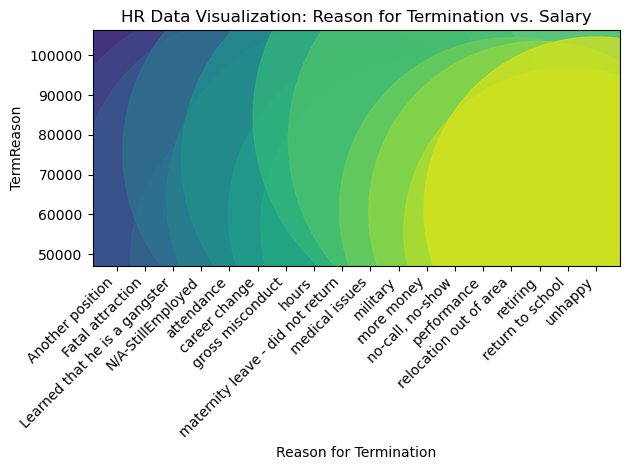

In [4]:
#This visualization will help you understand the relationship between the reasons for termination and 
# the corresponding average salary

#Larger bubbles represent higher average salaries, and the position on the x-axis indicates the reason for termination.

grouped_data = df2.groupby('TermReason')['Salary'].mean().reset_index()

#Set the size of the bubbles based on the average salary
sizes = grouped_data['Salary']

# Set colors for the bubbles
colors = plt.cm.viridis(grouped_data.index / len(grouped_data))

# Plot the bubble chart
plt.scatter(grouped_data.index, grouped_data['Salary'], s=sizes, c=colors, alpha=0.7)

# Add labels and title
plt.xlabel('Reason for Termination')
plt.ylabel('TermReason')
plt.title('HR Data Visualization: Reason for Termination vs. Salary')

# Customize x-axis labels with the TermReason
plt.xticks(grouped_data.index, grouped_data['TermReason'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_3824\1447706149.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


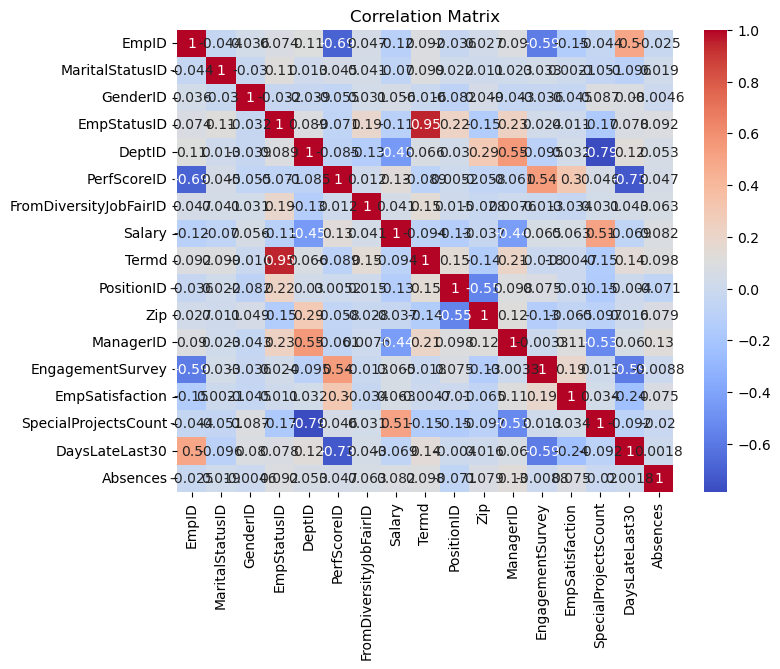

In [5]:
#The heat map visualizes the correlation matrix of the HR dataset. It shows the relationships between different numerical variables
#Warmer colors indicate positive correlations, while cooler colors indicate negative correlations.

correlation_matrix = df2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()